# K Nearest Neibhour

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import data set
url = "Adult_Census_Income_Binary_Classification_dataset.csv"
#read dataset to pandas dataframe
dataset = pd.read_csv(url)
print(dataset[0:8])

   age          workclass   education   education-num          marital-status  \
0   39          State-gov   Bachelors              13           Never-married   
1   50   Self-emp-not-inc   Bachelors              13      Married-civ-spouse   
2   38            Private     HS-grad               9                Divorced   
3   53            Private        11th               7      Married-civ-spouse   
4   28            Private   Bachelors              13      Married-civ-spouse   
5   37            Private     Masters              14      Married-civ-spouse   
6   49            Private         9th               5   Married-spouse-absent   
7   52   Self-emp-not-inc     HS-grad               9      Married-civ-spouse   

           occupation    relationship    race      sex   capital-gain  \
0        Adm-clerical   Not-in-family   White     Male           2174   
1     Exec-managerial         Husband   White     Male              0   
2   Handlers-cleaners   Not-in-family   White     M

In [3]:
#changing missing values to NaN
newdf = dataset.replace(r'\?', np.nan, regex=True)
print(newdf[0:8])

   age          workclass   education   education-num          marital-status  \
0   39          State-gov   Bachelors              13           Never-married   
1   50   Self-emp-not-inc   Bachelors              13      Married-civ-spouse   
2   38            Private     HS-grad               9                Divorced   
3   53            Private        11th               7      Married-civ-spouse   
4   28            Private   Bachelors              13      Married-civ-spouse   
5   37            Private     Masters              14      Married-civ-spouse   
6   49            Private         9th               5   Married-spouse-absent   
7   52   Self-emp-not-inc     HS-grad               9      Married-civ-spouse   

           occupation    relationship    race      sex   capital-gain  \
0        Adm-clerical   Not-in-family   White     Male           2174   
1     Exec-managerial         Husband   White     Male              0   
2   Handlers-cleaners   Not-in-family   White     M

In [4]:
#removing missing values
newdf=newdf.dropna()
print(newdf)

       age          workclass      education   education-num  \
0       39          State-gov      Bachelors              13   
1       50   Self-emp-not-inc      Bachelors              13   
2       38            Private        HS-grad               9   
3       53            Private           11th               7   
4       28            Private      Bachelors              13   
5       37            Private        Masters              14   
6       49            Private            9th               5   
7       52   Self-emp-not-inc        HS-grad               9   
8       31            Private        Masters              14   
9       42            Private      Bachelors              13   
10      37            Private   Some-college              10   
11      30          State-gov      Bachelors              13   
12      23            Private      Bachelors              13   
13      32            Private     Assoc-acdm              12   
15      34            Private        7th

In [5]:
newdf.dtypes

age                 int64
 workclass         object
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [6]:
#Label the categorigal variables
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in newdf.columns.values:
    if newdf[col].dtypes=='object':
        data=newdf[col]
        le.fit(data.values)
        newdf[col]=le.transform(newdf[col])
  

In [7]:
print(newdf[0:5])

   age   workclass   education   education-num   marital-status   occupation  \
0   39           5           9              13                4            0   
1   50           4           9              13                2            3   
2   38           2          11               9                0            5   
3   53           2           1               7                2            5   
4   28           2           9              13                2            9   

    relationship   race   sex   capital-gain   capital-loss   hours-per-week  \
0              1      4     1           2174              0               40   
1              0      4     1              0              0               13   
2              1      4     1              0              0               40   
3              0      2     1              0              0               40   
4              5      2     0              0              0               40   

    native-country   income  
0       

In [8]:
#split dataset into its attributes and labels
X = newdf.iloc[:, :-1].values
Y = newdf.iloc[:, 13].values

In [9]:
#normalize features
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()
scalar.fit(X)

X = scalar.transform(X)

H:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
print(X[0:3])

[[0.30136986 0.83333333 0.6        0.8        0.66666667 0.
  0.2        1.         1.         0.02174022 0.         0.39795918
  0.95      ]
 [0.45205479 0.66666667 0.6        0.8        0.33333333 0.23076923
  0.         1.         1.         0.         0.         0.12244898
  0.95      ]
 [0.28767123 0.33333333 0.73333333 0.53333333 0.         0.38461538
  0.2        1.         1.         0.         0.         0.39795918
  0.95      ]]


In [11]:
#training and test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)

In [12]:
#normalize features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [13]:
#comparing error with K value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0,0.5,'Mean Error')

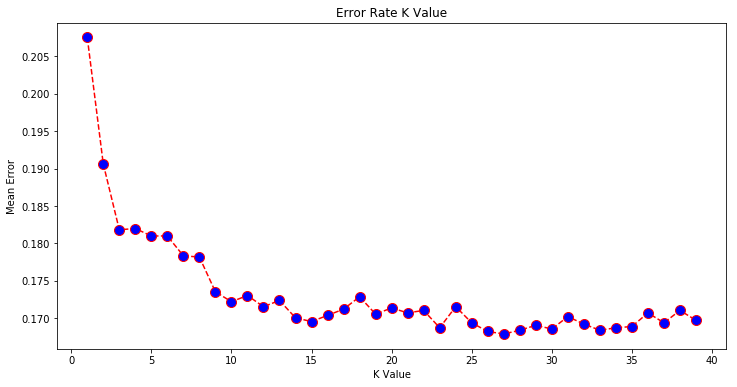

In [14]:
#plotting error vs K  values
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [15]:
#training 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=26)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=26, p=2,
           weights='uniform')

In [16]:
#Predict
y_pred = classifier.predict(X_test)

In [17]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred)) 

[[4204  339]
 [ 676  814]]
             precision    recall  f1-score   support

          0       0.86      0.93      0.89      4543
          1       0.71      0.55      0.62      1490

avg / total       0.82      0.83      0.82      6033



# Logistic Regression

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#fix random seed for reproducibility
np.random.seed(10)

H:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
#import data set
url = "Adult_Census_Income_Binary_Classification_dataset.csv"
#read dataset to pandas dataframe
dataset = pd.read_csv(url)
print(dataset[0:3])

   age          workclass   education   education-num       marital-status  \
0   39          State-gov   Bachelors              13        Never-married   
1   50   Self-emp-not-inc   Bachelors              13   Married-civ-spouse   
2   38            Private     HS-grad               9             Divorced   

           occupation    relationship    race    sex   capital-gain  \
0        Adm-clerical   Not-in-family   White   Male           2174   
1     Exec-managerial         Husband   White   Male              0   
2   Handlers-cleaners   Not-in-family   White   Male              0   

    capital-loss   hours-per-week  native-country  income  
0              0               40   United-States   <=50K  
1              0               13   United-States   <=50K  
2              0               40   United-States   <=50K  


In [20]:
#changing missing values to NaN
newdf = dataset.replace(r'\?', np.nan, regex=True)
print(newdf[0:3])

   age          workclass   education   education-num       marital-status  \
0   39          State-gov   Bachelors              13        Never-married   
1   50   Self-emp-not-inc   Bachelors              13   Married-civ-spouse   
2   38            Private     HS-grad               9             Divorced   

           occupation    relationship    race    sex   capital-gain  \
0        Adm-clerical   Not-in-family   White   Male           2174   
1     Exec-managerial         Husband   White   Male              0   
2   Handlers-cleaners   Not-in-family   White   Male              0   

    capital-loss   hours-per-week  native-country  income  
0              0               40   United-States   <=50K  
1              0               13   United-States   <=50K  
2              0               40   United-States   <=50K  


In [21]:
#checking number of rows has at least one missing value
newdf.isnull().any(axis=1).sum()

2399

In [22]:
#removing missing values
newdf=newdf.dropna()
print(newdf[0:30])

    age          workclass      education   education-num  \
0    39          State-gov      Bachelors              13   
1    50   Self-emp-not-inc      Bachelors              13   
2    38            Private        HS-grad               9   
3    53            Private           11th               7   
4    28            Private      Bachelors              13   
5    37            Private        Masters              14   
6    49            Private            9th               5   
7    52   Self-emp-not-inc        HS-grad               9   
8    31            Private        Masters              14   
9    42            Private      Bachelors              13   
10   37            Private   Some-college              10   
11   30          State-gov      Bachelors              13   
12   23            Private      Bachelors              13   
13   32            Private     Assoc-acdm              12   
15   34            Private        7th-8th               4   
16   25   Self-emp-not-i

In [23]:
newdf.dtypes

age                 int64
 workclass         object
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [24]:
#label the categorical variables
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data=newdf[' income']
le.fit(data.values)
newdf[' income']=le.transform(newdf[' income'])

In [25]:
newdf.dtypes

age                 int64
 workclass         object
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income             int64
dtype: object

In [26]:
#split and remove Y in dataset  
Y = newdf.iloc[:, -1:].values
newdf = newdf.drop(' income', 1)

In [27]:
print(newdf.columns.values)

['age' ' workclass' ' education' ' education-num' ' marital-status'
 ' occupation' ' relationship' ' race' ' sex' ' capital-gain'
 ' capital-loss' ' hours-per-week' ' native-country']


In [28]:
#one hot the categorigal variables
for col in newdf.columns.values:
    if newdf[col].dtypes=='object':
        one_hot = pd.get_dummies(newdf[col])
        one_hot = one_hot.add_prefix(col)
        newdf = newdf.join(one_hot)             #adding onehot encoded columns to dataframe
        newdf = newdf.drop(col, 1) 

In [29]:
print(newdf[0:2])

   age   education-num   capital-gain   capital-loss   hours-per-week  \
0   39              13           2174              0               40   
1   50              13              0              0               13   

    workclass Federal-gov   workclass Local-gov   workclass Private  \
0                       0                     0                   0   
1                       0                     0                   0   

    workclass Self-emp-inc   workclass Self-emp-not-inc  \
0                        0                            0   
1                        0                            1   

              ...               native-country Portugal  \
0             ...                                     0   
1             ...                                     0   

    native-country Puerto-Rico   native-country Scotland  \
0                            0                         0   
1                            0                         0   

    native-country South   na

In [30]:
newdf.dtypes

age                                           int64
 education-num                                int64
 capital-gain                                 int64
 capital-loss                                 int64
 hours-per-week                               int64
 workclass Federal-gov                        uint8
 workclass Local-gov                          uint8
 workclass Private                            uint8
 workclass Self-emp-inc                       uint8
 workclass Self-emp-not-inc                   uint8
 workclass State-gov                          uint8
 workclass Without-pay                        uint8
 education 10th                               uint8
 education 11th                               uint8
 education 12th                               uint8
 education 1st-4th                            uint8
 education 5th-6th                            uint8
 education 7th-8th                            uint8
 education 9th                                uint8
 education A

In [31]:
#split dataset into its attributes and labels
X = newdf.values

In [32]:
print(X[0:2])

[[  39   13 2174    0   40    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    1    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    1    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0]
 [  50   13    0    0   13    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    1    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    1    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0

In [33]:
#normalize features
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()
scalar.fit(X)

X = scalar.transform(X)

H:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
print(X[0:2])

[[0.30136986 0.8        0.02174022 0.         0.39795918 0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [35]:
#training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)

In [36]:
#define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=103,kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [37]:
#fit the model
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=0,mode='auto')
weights=model.get_weights()
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=1000,callbacks = [early_stopping])

Train on 19303 samples, validate on 4826 samples
Epoch 1/1000
19303/19303 [==============================] - 1s 47us/step - loss: 0.4823 - acc: 0.7684 - val_loss: 0.4060 - val_acc: 0.8145
Epoch 2/1000
19303/19303 [==============================] - 1s 51us/step - loss: 0.3955 - acc: 0.8179 - val_loss: 0.3771 - val_acc: 0.8286
Epoch 3/1000
19303/19303 [==============================] - 1s 50us/step - loss: 0.3769 - acc: 0.8259 - val_loss: 0.3666 - val_acc: 0.8301
Epoch 4/1000
19303/19303 [==============================] - 1s 45us/step - loss: 0.3686 - acc: 0.8294 - val_loss: 0.3608 - val_acc: 0.8305
Epoch 5/1000
19303/19303 [==============================] - 1s 43us/step - loss: 0.3635 - acc: 0.8302 - val_loss: 0.3574 - val_acc: 0.8307
Epoch 6/1000
19303/19303 [==============================] - 1s 60us/step - loss: 0.3601 - acc: 0.8310 - val_loss: 0.3548 - val_acc: 0.8334
Epoch 7/1000
19303/19303 [==============================] - 1s 61us/step - loss: 0.3575 - acc: 0.8312 - val_loss: 0.3

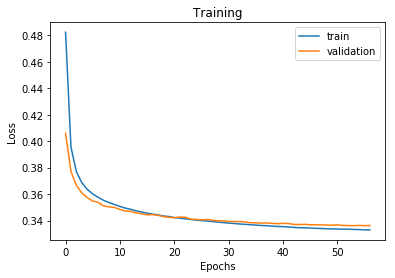

In [38]:
# Plot history of loss and validation loss against epoch
plt.plot(np.array(history.history['loss']), label="train")
plt.plot(np.array(history.history['val_loss']), label="validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training")
plt.legend()
plt.show()

In [39]:
# Test the trained model on the test set
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.33549813673050866
Test accuracy: 0.8506547323451713


In [40]:
#Predict
y_pred = model.predict_classes(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred)) 

[[4169  340]
 [ 561  963]]
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      4509
          1       0.74      0.63      0.68      1524

avg / total       0.85      0.85      0.85      6033



# Neural Network

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#fix random seed for reproducibility
np.random.seed(10)

In [42]:
#import data set
url = "Adult_Census_Income_Binary_Classification_dataset.csv"
#read dataset to pandas dataframe
dataset = pd.read_csv(url)
print(dataset[0:3])

   age          workclass   education   education-num       marital-status  \
0   39          State-gov   Bachelors              13        Never-married   
1   50   Self-emp-not-inc   Bachelors              13   Married-civ-spouse   
2   38            Private     HS-grad               9             Divorced   

           occupation    relationship    race    sex   capital-gain  \
0        Adm-clerical   Not-in-family   White   Male           2174   
1     Exec-managerial         Husband   White   Male              0   
2   Handlers-cleaners   Not-in-family   White   Male              0   

    capital-loss   hours-per-week  native-country  income  
0              0               40   United-States   <=50K  
1              0               13   United-States   <=50K  
2              0               40   United-States   <=50K  


In [43]:
#changing missing values to NaN
newdf = dataset.replace(r'\?', np.nan, regex=True)
print(newdf[0:3])

   age          workclass   education   education-num       marital-status  \
0   39          State-gov   Bachelors              13        Never-married   
1   50   Self-emp-not-inc   Bachelors              13   Married-civ-spouse   
2   38            Private     HS-grad               9             Divorced   

           occupation    relationship    race    sex   capital-gain  \
0        Adm-clerical   Not-in-family   White   Male           2174   
1     Exec-managerial         Husband   White   Male              0   
2   Handlers-cleaners   Not-in-family   White   Male              0   

    capital-loss   hours-per-week  native-country  income  
0              0               40   United-States   <=50K  
1              0               13   United-States   <=50K  
2              0               40   United-States   <=50K  


In [44]:
#checking number of rows has at least one missing value
newdf.isnull().any(axis=1).sum()

2399

In [45]:
#removing missing values
newdf=newdf.dropna()
print(newdf[0:30])

    age          workclass      education   education-num  \
0    39          State-gov      Bachelors              13   
1    50   Self-emp-not-inc      Bachelors              13   
2    38            Private        HS-grad               9   
3    53            Private           11th               7   
4    28            Private      Bachelors              13   
5    37            Private        Masters              14   
6    49            Private            9th               5   
7    52   Self-emp-not-inc        HS-grad               9   
8    31            Private        Masters              14   
9    42            Private      Bachelors              13   
10   37            Private   Some-college              10   
11   30          State-gov      Bachelors              13   
12   23            Private      Bachelors              13   
13   32            Private     Assoc-acdm              12   
15   34            Private        7th-8th               4   
16   25   Self-emp-not-i

In [46]:
newdf.dtypes

age                 int64
 workclass         object
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [47]:
#label the categorical variables
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data=newdf[' income']
le.fit(data.values)
newdf[' income']=le.transform(newdf[' income'])

In [48]:
newdf.dtypes

age                 int64
 workclass         object
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income             int64
dtype: object

In [49]:
#split and remove Y in dataset  
Y = newdf.iloc[:, -1:].values
newdf = newdf.drop(' income', 1)

In [50]:
print(newdf.columns.values)

['age' ' workclass' ' education' ' education-num' ' marital-status'
 ' occupation' ' relationship' ' race' ' sex' ' capital-gain'
 ' capital-loss' ' hours-per-week' ' native-country']


In [51]:
#one hot the categorigal variables
for col in newdf.columns.values:
    if newdf[col].dtypes=='object':
        one_hot = pd.get_dummies(newdf[col])
        one_hot = one_hot.add_prefix(col)
        newdf = newdf.join(one_hot)             #adding onehot encoded columns to dataframe
        newdf = newdf.drop(col, 1)              #deleting categorical column

In [52]:
print(newdf[0:3])

   age   education-num   capital-gain   capital-loss   hours-per-week  \
0   39              13           2174              0               40   
1   50              13              0              0               13   
2   38               9              0              0               40   

    workclass Federal-gov   workclass Local-gov   workclass Private  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   1   

    workclass Self-emp-inc   workclass Self-emp-not-inc  \
0                        0                            0   
1                        0                            1   
2                        0                            0   

              ...               native-country Portugal  \
0             ...                                     0   
1             ...                                     0   
2       

In [53]:
newdf.dtypes

age                                           int64
 education-num                                int64
 capital-gain                                 int64
 capital-loss                                 int64
 hours-per-week                               int64
 workclass Federal-gov                        uint8
 workclass Local-gov                          uint8
 workclass Private                            uint8
 workclass Self-emp-inc                       uint8
 workclass Self-emp-not-inc                   uint8
 workclass State-gov                          uint8
 workclass Without-pay                        uint8
 education 10th                               uint8
 education 11th                               uint8
 education 12th                               uint8
 education 1st-4th                            uint8
 education 5th-6th                            uint8
 education 7th-8th                            uint8
 education 9th                                uint8
 education A

In [54]:
#split dataset into its attributes and labels
X = newdf.values

In [55]:
print(X[0:2])

[[  39   13 2174    0   40    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    1    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    1    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0]
 [  50   13    0    0   13    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    1    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    1    0    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0

In [56]:
#normalize features
from sklearn.preprocessing import MinMaxScaler
scalar= MinMaxScaler()
scalar.fit(X)

X = scalar.transform(X)

H:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
print(X[0:3])

[[0.30136986 0.8        0.02174022 0.         0.39795918 0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [58]:
#training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)

In [59]:
#create model
model= Sequential()
model.add(Dense(45,input_dim=103, kernel_initializer='uniform',activation='relu'))
model.add(Dense(90,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))



In [60]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [61]:
#fit the model
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0,mode='auto')
weights=model.get_weights()
history=model.fit(X_train,Y_train,validation_split=0.2,epochs=150,callbacks = [early_stopping])


Train on 19303 samples, validate on 4826 samples
Epoch 1/150
19303/19303 [==============================] - 1s 50us/step - loss: 0.3920 - acc: 0.8103 - val_loss: 0.3483 - val_acc: 0.8373
Epoch 2/150
19303/19303 [==============================] - 1s 45us/step - loss: 0.3440 - acc: 0.8385 - val_loss: 0.3524 - val_acc: 0.8355
Epoch 3/150
19303/19303 [==============================] - 1s 58us/step - loss: 0.3339 - acc: 0.8422 - val_loss: 0.3329 - val_acc: 0.8433
Epoch 4/150
19303/19303 [==============================] - 1s 57us/step - loss: 0.3285 - acc: 0.8442 - val_loss: 0.3297 - val_acc: 0.8450
Epoch 5/150
19303/19303 [==============================] - 1s 55us/step - loss: 0.3229 - acc: 0.8474 - val_loss: 0.3313 - val_acc: 0.8394
Epoch 6/150
19303/19303 [==============================] - 1s 51us/step - loss: 0.3198 - acc: 0.8487 - val_loss: 0.3300 - val_acc: 0.8431


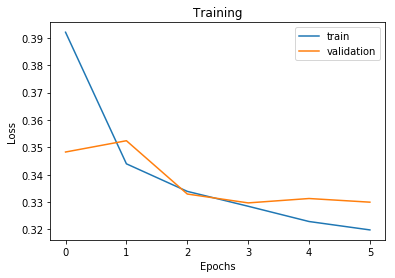

In [62]:
# Plot history of loss and validation loss against epoch
plt.plot(np.array(history.history['loss']), label="train")
plt.plot(np.array(history.history['val_loss']), label="validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training")
plt.legend()
plt.show()

In [63]:
# Test the trained model on the test set
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])



Test loss: 0.32605077711855734
Test accuracy: 0.8493286922324579


In [64]:
#Predict
y_pred = model.predict_classes(X_test)

#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred)) 

[[4142  367]
 [ 542  982]]
             precision    recall  f1-score   support

          0       0.88      0.92      0.90      4509
          1       0.73      0.64      0.68      1524

avg / total       0.84      0.85      0.85      6033

